In [13]:
import pandas as pd

In [28]:
import numpy as np

In [14]:
A = pd.read_csv(r"C:\Users\gisse\Downloads\Cellphone.csv")

In [15]:
B = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneCV.csv")

In [16]:
C = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneValidation.csv")

In [17]:
D = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneTrain.csv")

In [18]:
E = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneTest.csv")

In [23]:
E

,Customer,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,1483,149,1,0,0.37,1,207.3,115,56.7,9.92,8.6,No
1,1484,52,1,0,0.00,2,217.0,104,50.0,7.62,11.8,No
2,1485,93,1,1,2.97,0,116.9,120,69.7,11.62,11.0,No
3,1486,116,1,0,0.00,0,160.7,69,40.0,7.34,8.2,No
4,1487,121,1,1,2.62,5,263.1,70,95.2,13.97,9.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...
664,2147,201,1,0,0.24,1,212.7,72,58.4,11.26,7.0,No
665,2148,108,0,0,0.38,2,115.1,114,41.8,10.57,13.8,Yes
666,2149,70,1,0,0.31,0,177.4,125,53.1,11.31,10.9,No
667,2150,62,1,0,0.00,4,245.3,91,53.0,6.15,8.5,No


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

A = pd.read_csv(r"C:\Users\gisse\Downloads\Cellphone.csv")

X = A.drop('Churn', axis=1)
y = A['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

overall_rate = tree_classifier.score(X_test, y_test)
class_error_rate = 1 - overall_rate

best_pruned_tree = DecisionTreeClassifier(ccp_alpha=0.03, random_state=42)  
best_pruned_tree.fit(X_train, y_train)
best_pruned_error_rate = 1 - best_pruned_tree.score(X_test, y_test)

print(f"Overall Rate on Test Set: {overall_rate:.4f}")
print(f"Class Error Rate on Test Set: {class_error_rate:.4f}")
print(f"Class Error Rate of Best-Pruned Tree on Test Set: {best_pruned_error_rate:.4f}")

tree_rules = export_text(best_pruned_tree, feature_names=list(X.columns))
print("\nRules of the Best-Pruned Tree:")
print(tree_rules)

Overall Rate on Test Set: 0.8329
Class Error Rate on Test Set: 0.1671
Class Error Rate of Best-Pruned Tree on Test Set: 0.1903

Rules of the Best-Pruned Tree:
|--- CustServCalls <= 3.50
|   |--- DayMins <= 236.15
|   |   |--- class: No
|   |--- DayMins >  236.15
|   |   |--- class: No
|--- CustServCalls >  3.50
|   |--- class: Yes



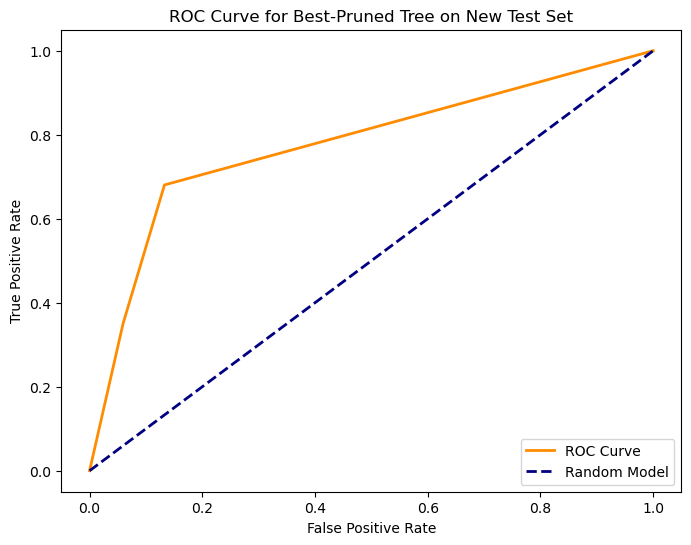

Lift for the top 10% on the new test set: 334.5000


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

A = pd.read_csv(r"C:\Users\gisse\Downloads\Cellphone.csv")
E = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneTest.csv")

X_train = A.drop('Churn', axis=1)
y_train = A['Churn']

X_test_new = E.drop('Churn', axis=1)
y_test_new = E['Churn']

le = LabelEncoder()
y_test_new_binary = le.fit_transform(y_test_new)

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

best_pruned_tree = DecisionTreeClassifier(ccp_alpha=0.03, random_state=42)
best_pruned_tree.fit(X_train, y_train)

X_test_new = X_test_new[X_train.columns]

fig, ax = plt.subplots(figsize=(8, 6))

y_score = best_pruned_tree.predict_proba(X_test_new)[:, 1]

fpr, tpr, _ = roc_curve(y_test_new_binary, y_score)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best-Pruned Tree on New Test Set')
plt.legend(loc='lower right')
plt.show()

y_pred_binary = le.transform(best_pruned_tree.predict(X_test_new))

num_samples_new = len(y_test_new)
top_10_percent_new = int(0.1 * num_samples_new)

top_10_percent_predictions_new = np.argsort(y_score)[::-1][:top_10_percent_new]

lift_new = np.sum(y_pred_binary[top_10_percent_predictions_new] == y_test_new_binary[top_10_percent_predictions_new]) / (top_10_percent_new / num_samples_new)

print(f"Lift for the top 10% on the new test set: {lift_new:.4f}")

In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

B = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneCV.csv")

X = B.drop('Churn', axis=1)
y = B['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


num_trees_list = [50, 100, 150]
num_features_list = [None, 'sqrt', 'log2']

best_accuracy = 0
best_num_trees = 0
best_num_features = None

for num_trees in num_trees_list:
    for num_features in num_features_list:
     
        rf_classifier = RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=42)

        cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

        mean_accuracy = cv_scores.mean()

        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_num_trees = num_trees
            best_num_features = num_features

best_rf = RandomForestClassifier(n_estimators=best_num_trees, max_features=best_num_features, random_state=42)
best_rf.fit(X_train, y_train)

y_val_pred = best_rf.predict(X_val)
accuracy_on_val = accuracy_score(y_val, y_val_pred)

print(f"Best Random Forest Model:")
print(f"Number of Trees: {best_num_trees}")
print(f"Number of Features per Tree: {best_num_features}")
print(f"Accuracy on Validation Set: {accuracy_on_val:.4f}")

Best Random Forest Model:
Number of Trees: 150
Number of Features per Tree: sqrt
Accuracy on Validation Set: 0.9057


In [35]:

best_rf = RandomForestClassifier(n_estimators=best_num_trees, max_features=best_num_features, random_state=42)
best_rf.fit(X_train, y_train)

feature_importances = best_rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
            Feature  Importance
6           DayMins    0.163409
0          Customer    0.147097
5     CustServCalls    0.127366
8     MonthlyCharge    0.125473
2   ContractRenewal    0.088066
9        OverageFee    0.073227
10         RoamMins    0.066898
4         DataUsage    0.064729
7          DayCalls    0.056271
1      AccountWeeks    0.051987
3          DataPlan    0.035476


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

C = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneValidation.csv")
E = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneTest.csv")
D = pd.read_csv(r"C:\Users\gisse\Downloads\CellphoneTrain.csv")

X_train = D.drop('Churn', axis=1)
y_train = D['Churn']

X_val = C.drop('Churn', axis=1)
y_val = C['Churn']

X_test = E.drop('Churn', axis=1)
y_test = E['Churn']

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_val_pred = logreg.predict_proba(X_val)[:, 1]
auc_val = roc_auc_score(y_val, y_val_pred)

print(f"AUC for the ROC curve on the validation set: {auc_val:.4f}")

y_test_pred = logreg.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred)

print(f"AUC for the ROC curve on the test set: {auc_test:.4f}")

coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

print("\nFinal Model Coefficients:")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

print(f"\nIntercept: {intercept}")

AUC for the ROC curve on the validation set: 0.7717
AUC for the ROC curve on the test set: 0.7745

Final Model Coefficients:
Customer: -0.0018633185902677814
AccountWeeks: -0.0014192383354484296
ContractRenewal: -2.225158166427081
DataPlan: -0.17989850142740302
DataUsage: -0.001958206268304504
CustServCalls: 0.6781074664428579
DayMins: 0.012198786707700662
DayCalls: -0.009781072793420288
MonthlyCharge: -0.02043278106706002
OverageFee: 0.19331351305692823
RoamMins: -0.03604681237748273

Intercept: -0.40485632961856166


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
